# Pain Relievers
In this class, we discuss the pain relievers that people usually can get only when having a prescription from a doctor, such as Darvocet, Darvon, or Tylenol.

In [1]:
#disable some annoying warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

#plots the figures in place instead of a new window
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

In [2]:
#data is a tsv file therefore read it as a csv file with \t as the seperator
dataset = pd.read_csv('data/drugs-dataset.tsv', delimiter = '\t')

In [3]:
case_quest_data = dataset.ix[:,0:2].copy()
pain_relievers = dataset.ix[:,'DARVTYLC':'OXDAYPWK'].copy() # pain_relievers dataset

### 1. How many cases used the drug
There are 8302 cases in the survey.

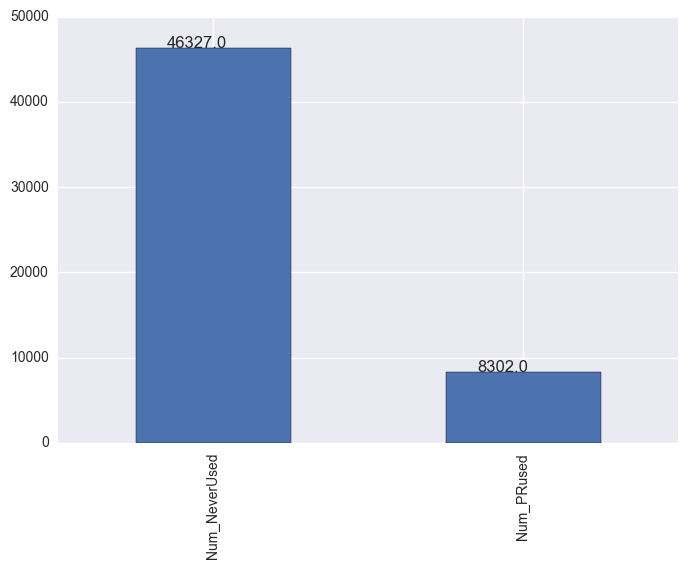

In [9]:

Num_NeverUsed=pain_relievers.query('DARVTYLC ==91').shape[0]
Num_PRused=pain_relievers.query('(ANLCARD ==1)|(VICOLOR ==1)|(PERCTYLX ==1)|(DARVTYLC ==1)').shape[0]
Num__PR =  {"Num":{"Num_NeverUsed":Num_NeverUsed, "Num_PRused":Num_PRused }}
DF_Num__PR=pd.DataFrame(Num__PR).sort_values('Num', ascending = False)

ax = DF_Num__PR['Num'].plot.bar()

for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x()+0.1 , p.get_height()+50))

###  2.What are their age range?

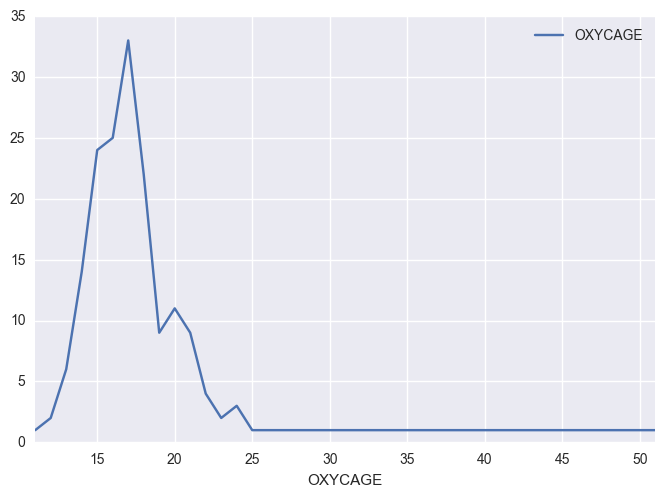

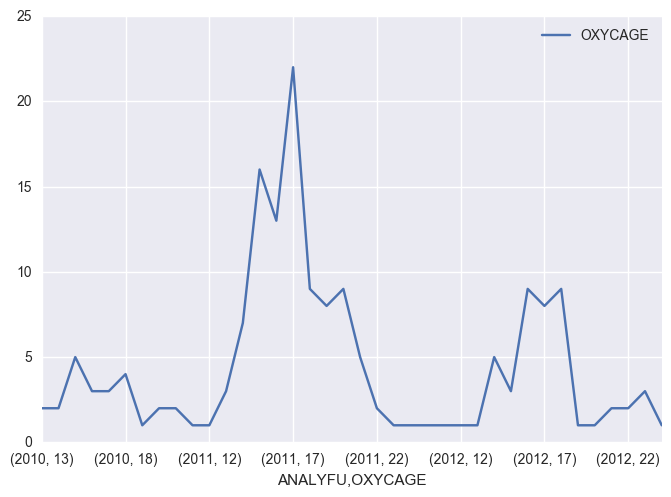

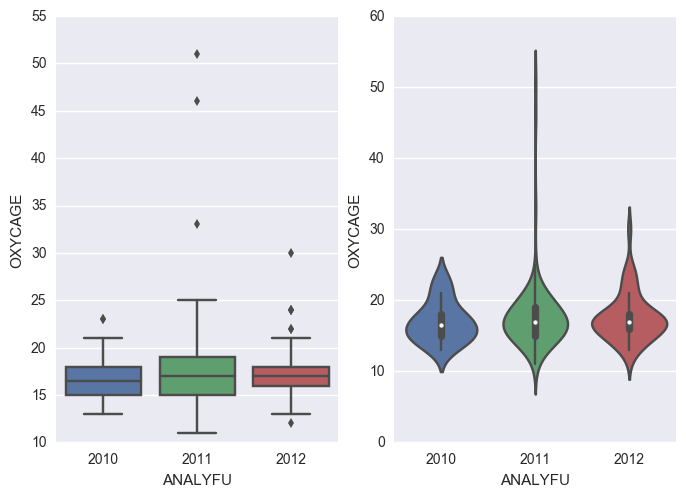

In [15]:
#query_data those who have used 
pain_relievers_1=pain_relievers.query('((ANLCARD ==1)|(VICOLOR ==1)|(PERCTYLX ==1)|(DARVTYLC ==1))&(OXYCAGE <=69)&(ANALYFU<=2013)')
count = pain_relievers_1.groupby('OXYCAGE').agg({ 'OXYCAGE': 'count'})
count.plot()

# year & age
count_year = pain_relievers_1.groupby(['ANALYFU','OXYCAGE']).agg({ 'OXYCAGE': 'count'})
count_year.plot()

pain_relievers_1.plot(kind='scatter', x='ANALYFU',y='OXYCAGE')

#playing with categories ... seaborn is pretty good with it
#plt.figure(figsize=(40,20))
plt.subplot(121)
sns.boxplot(x='ANALYFU',y='OXYCAGE',data=pain_relievers_1)

plt.subplot(122)
sns.violinplot(x='ANALYFU',y='OXYCAGE',data=pain_relievers_1)


### 3.How frequently they use it?

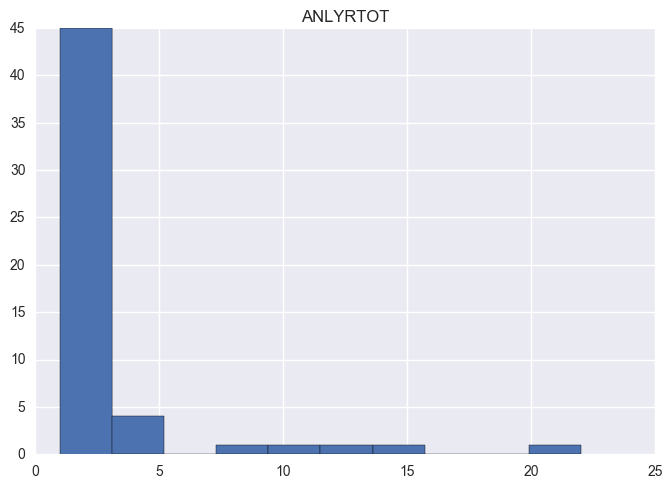

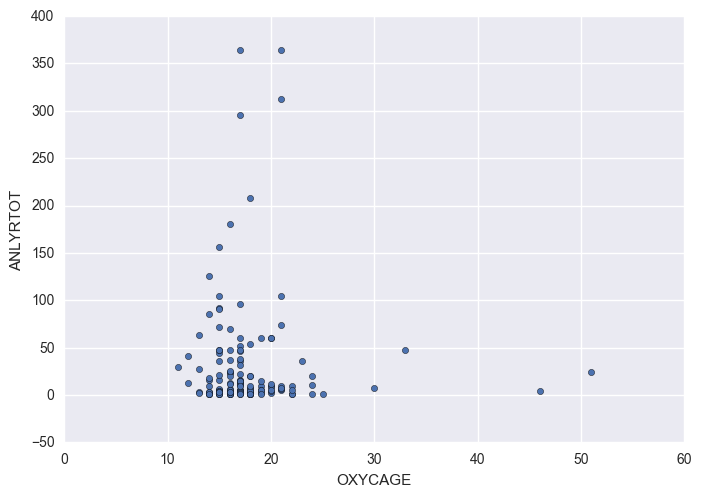

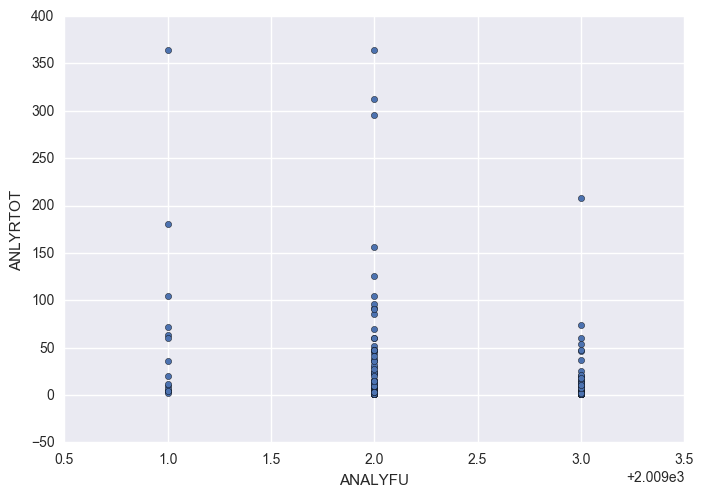

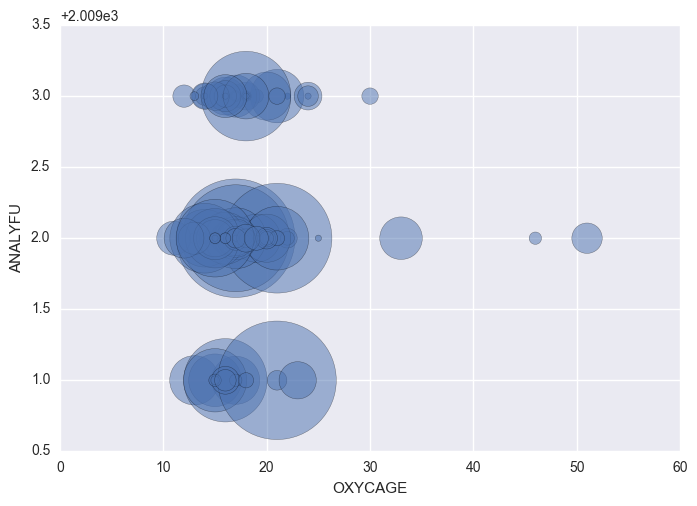

In [19]:
pr_fre=pain_relievers.query('(ANLYRTOT<985)&(OXYCAGE <=69)& (ANALYFU<=2012)')
count_days = pr_fre.groupby('ANLYRTOT').agg({ 'ANLYRTOT': 'count'})
count_days.hist()

pr_fre.plot(kind='scatter', x='OXYCAGE',y='ANLYRTOT')
pr_fre.plot(kind='scatter', x='ANALYFU',y='ANLYRTOT')
pr_fre.plot(kind='scatter', x='OXYCAGE',y='ANALYFU',s=pr_fre['ANLYRTOT']*20,alpha=0.5)

In [ ]:
OXYCAGE
ANALYFU : first year
ANALREC: last use 
ANLYRTOT: per year

### 4.Did they stop and go back to it? Are they planning to quit?

1 = Within the past 30 days
2 = More than 30 days ago but within the past 12 mons
3 = More than 12 months ago 


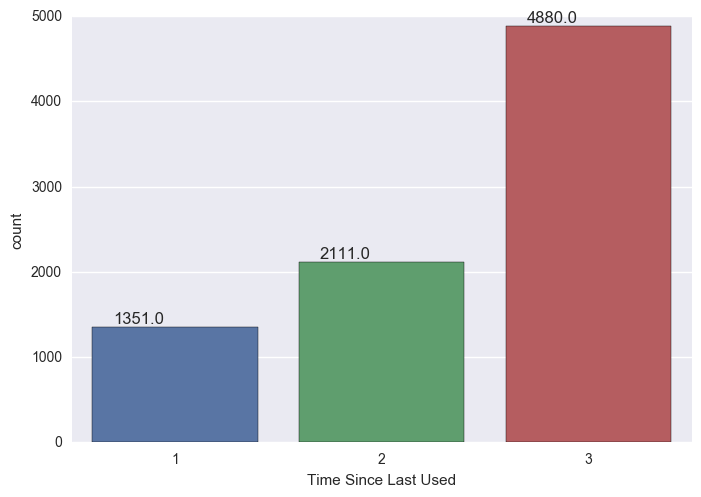

In [17]:

pain_relievers_quit=pain_relievers.query('ANALREC<4')
ax = sns.countplot(pain_relievers_quit['ANALREC'])
plt.xlabel('Time Since Last Used')
for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

## Next

[Tranquilizers](Tranquilizers.ipynb)